# <b>2 <span style='color:#78D118'>|</span> Preparing the Data</b>

In [1]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

**Preparing our dataset**

In [2]:
data_dir = "dataset" # Datasets path
data_dir = pathlib.Path(data_dir)

**Separating the categories**

In [3]:
private = list(data_dir.glob('private/*'))
public = list(data_dir.glob('public/*'))


**Checking samples**

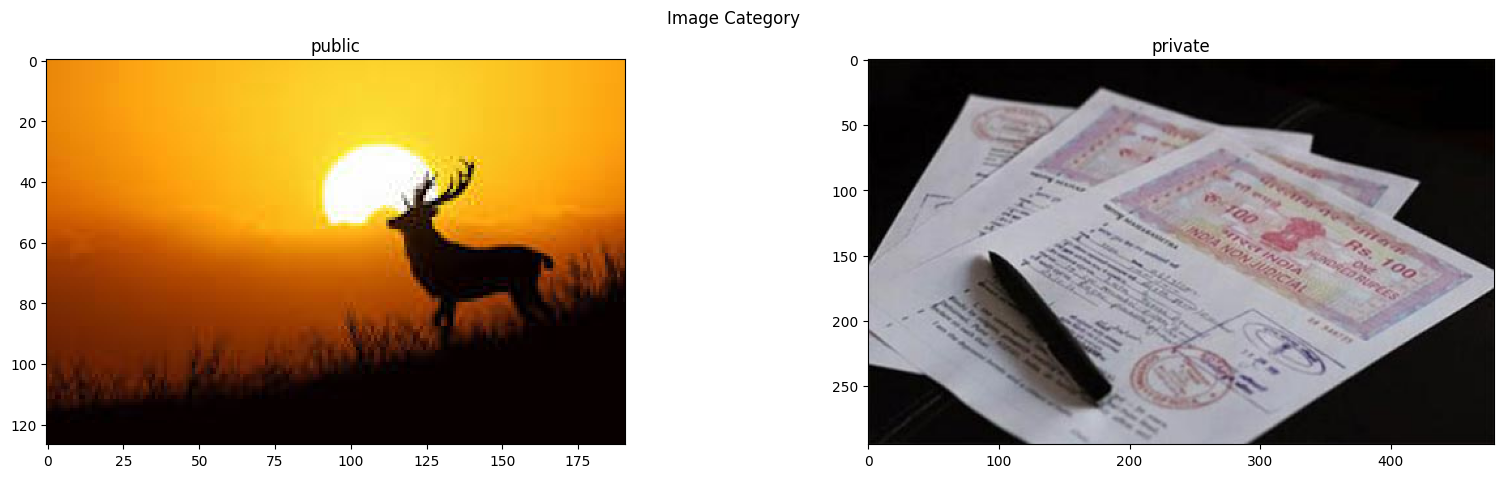

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Image Category')
public_image = img.imread(public[0])
private_image = img.imread(private[0])


ax[0].set_title('public')
ax[1].set_title('private')



ax[0].imshow(public_image)
ax[1].imshow(private_image)


**Assigning a separate dictionary for images and their corresponding labels**

In [6]:
# Contains the images path
df_images = {
    'public' : public,
    'private' : private
}

# Contains numerical labels for the categories
df_labels = {
    'public' : 0,
    'private' : 1
}

**Since the MobileNetv2 training images dimensions are 224 by 224 by 3, we have to reshape our categories into that**

In [7]:
img = cv2.imread(str(df_images['public'][0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(127, 191, 3)

In [8]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

**Splitting the data and standarization**

In [12]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [13]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# <b>3 <span style='color:#78D118'>|</span> Creating the Model</b>

In [17]:
mobile_net = 'mobilenetv2' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [18]:
num_label = 5 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


# <b>4 <span style='color:#78D118'>|</span> Training the Model</b>

In [19]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
20/20 [==============================] - 13s 467ms/step - loss: 0.7459 - acc: 0.6522 - val_loss: 0.4391 - val_acc: 0.8269
Epoch 2/10
20/20 [==============================] - 9s 424ms/step - loss: 0.2947 - acc: 0.8702 - val_loss: 0.3503 - val_acc: 0.8654
Epoch 3/10
20/20 [==============================] - 8s 424ms/step - loss: 0.2093 - acc: 0.9231 - val_loss: 0.3871 - val_acc: 0.8269
Epoch 4/10
20/20 [==============================] - 8s 423ms/step - loss: 0.1596 - acc: 0.9599 - val_loss: 0.3056 - val_acc: 0.8654
Epoch 5/10
20/20 [==============================] - 8s 422ms/step - loss: 0.1337 - acc: 0.9679 - val_loss: 0.3052 - val_acc: 0.8654
Epoch 6/10
20/20 [==============================] - 9s 428ms/step - loss: 0.1162 - acc: 0.9744 - val_loss: 0.3117 - val_acc: 0.8462
Epoch 7/10
20/20 [==============================] - 8s 419ms/step - loss: 0.0986 - acc: 0.9792 - val_loss: 0.2926 - val_acc: 0.8654
Epoch 8/10
20/20 [==============================] - 8s 410ms/step - loss: 0

# <b>5 <span style='color:#78D118'>|</span> Evaluate the Model</b>

#### evaluated the model using accuracy, recall, precision and f1-score

In [20]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 2s 399ms/step - loss: 0.1464 - acc: 0.9359


[0.14640630781650543, 0.9358974099159241]

# Model has a validation accuarccy of 93.59%

In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

3/3 [==============================] - 3s 649ms/step
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.96      0.92      0.94        85

    accuracy                           0.94       156
   macro avg       0.93      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



In [22]:
# saving the model to disk
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
